# Project 4 - Unstructured Text Analysis
---

- Your Name Here: Anthony Ayala
- WFU Email Address: ayalax19@wfu.edu
- Submission Date: 8/13/21

# Instructions

1. Download the notebook `job_descriptions_and_resume.ipynb` and the dataset `MSBA20JobDescriptions.xlsx` from the course website.

2. Open the notebook on your local computer; Or upload and open it in Google Colab.

3. Replace the placeholder text above with your name, email address, and submission date.

4. Be sure to display your results.

5. Please submit your notebook in **HTML** and your writeup in a **Word doc**

## Load libraries

Load the following libraries, you may need to install them first!
- Data Manipulation: `pandas`, `numpy`
- Data Visualization：`seaborn`, `matplotlib.pyplot`
- Text libraries:
```python
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from wordcloud import WordCloud
```
- Other: `warnings` (ignore warning messages)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# standard libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#text libraries
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string
from textblob import TextBlob
from wordcloud import WordCloud

## Task 0 - Gather Jobs

1. Create the jobs dataframe `df_jobs` by using `pd.read_excel()` to read in your `My20MSBAJobDescriptions.xlsx` (after you’ve loaded it with jobs of your choice)

> You can get started by using the `MSBA20JobDescription.xlsx` file if you want.

2. I recommend cleaning up the column names using:
```python
df_jobs.columns = (df_jobs.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '')
)
```

3. Print the first 5 jobs to make sure your import works.

In [ ]:
df_jobs = pd.read_excel('/content/MSBA Job Descriptions by Anthony Ayala.xlsx')
df_jobs.head()

,Title,Firm,Job Description
0,Business Analyst,Live Nation Entertainment,The team oversees strategy and analytics for t...
1,Pricing Analyst,Ticketmaster,Ticketmaster Travel is a new service we are in...
2,Data Analyst,Live Nation Entertainment,"Passionate and driven, with an entrepreneurial..."
3,Analyst - Digital Technology,United Airlines,There’s never been a more exciting time to joi...
4,"Analyst/Senior Analyst, Corporate Development",American Airlines,Are you ready to explore a world of possibilit...


In [ ]:
# Let's check how many rows we have, data type of our columns, and more.
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            34 non-null     object
 1   Firm             34 non-null     object
 2   Job Description  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


In [ ]:
# Let's clean up our columns to make the process of accessing and performing analysis much easier
df_jobs.columns = (df_jobs.columns
 .str.strip()
 .str.lower()
 .str.replace(' ', '_')
 .str.replace('-', '_')
 .str.replace('(', '')
 .str.replace(')', '')
 .str.replace('?', '')
 .str.replace('\'', '')
)

In [ ]:
# Now let's see the first five results of our df_jobs
df_jobs.head()

,title,firm,job_description
0,Business Analyst,Live Nation Entertainment,The team oversees strategy and analytics for t...
1,Pricing Analyst,Ticketmaster,Ticketmaster Travel is a new service we are in...
2,Data Analyst,Live Nation Entertainment,"Passionate and driven, with an entrepreneurial..."
3,Analyst - Digital Technology,United Airlines,There’s never been a more exciting time to joi...
4,"Analyst/Senior Analyst, Corporate Development",American Airlines,Are you ready to explore a world of possibilit...


## Task 1 - Job Description Term & Bigram Frequency Analysis

1.Create a table of term frequencies

The following steps will help you make your `term_frequency` table need to make your first wordcloud.
- make a list called `exclude_words`:
>
```python
# This is just an exmaple:
exclude_words = ["key", "clients", "chicago"]
```
- download and create another list of stopwords
>
```python
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
```

- pick your column of job description from `df_jobs`, implement the following:
  - change its text into lower cases
  - remove leading and trailing spaces
  - do string encodings using `.normalize('NFKD')`
  - make a list of text than create rows of words using `.explode()`
  - remove punctuation
  - remove digits (if needed)
  - name it as a new data frame `"term_df"` with a single column `"term"`

- pick your data frame `term_df`, implement the following steps:
  - remove words from your lists of `exclude_words` and `stop_words`
  - remove any words you think make sense
  - groupby("term") and summarize or simply use size()
  - sort terms by their frequency in descending order
  - create the `term_frequency` table
  - finally, print out the the top 20 terms

 > Hint:  A good reference is [here](https://colab.research.google.com/drive/1DdK_2Pn-LRSNnUhfuyBLEZlWvoFbffM_?usp=sharing).

In [ ]:
# Create a list of stop words:
exclude_words = ["key", "clients", "Chicago", 'job', 'role', 'history', "company's", 'company', 'goal', ' goals', 'position', 'responsibility', 'responsibilities', 'San Franciso' 'CA', 'IL', 'NY', 'location', 'minimum', 'qualifications', 'qualifcation', 'preferred', 'description', 'requirements']

# Convert the list to a dataframe
exclude_df = pd.DataFrame(list(exclude_words), columns=['stopword'])
exclude_df

,stopword
0,key
1,clients
2,Chicago
3,job
4,role
5,history
6,company's
7,company
8,goal
9,goals


In [ ]:
# Download and create another list of stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Create another list of stop words
stop_words = set(stopwords.words('english'))

# Convert the set to a dataframe
stopwords_df = pd.DataFrame(list(stop_words), columns=['stopword'])
print("There are {} words in the stopword list here is a sample: \n {}".format(stopwords_df.shape[0],list(stop_words)[0:4]))

There are 179 words in the stopword list here is a sample: 
 ['can', "don't", 'themselves', 'yours']


In [ ]:
# Pick the job description column from df_jobs to prepare and explode
term_df = (df_jobs['job_description']
             .str.lower()
             .str.strip() # remove leading and trailing spaces
             .str.normalize('NFKD') # string encodings
             .str.split() # make a list of text
             .explode() # create rows of words
             .str.replace(f"[{string.punctuation}]", "")
             .str.replace("'", '') # Remove punctuation
             .str.replace('\d+', '') # remove numbers with Pandas string method
             .reset_index(drop=True)
             .to_frame('term')
          )
term_df.head(10)

,term
0,the
1,team
2,oversees
3,strategy
4,and
5,analytics
6,for
7,the
8,concerts
9,division


2. Create a wordcloud with all of the terms, using WordCloud()

In [ ]:
# Create a table of term frequencies using Job Descriptions and we will remove the junk
# pick your data frame term_df, implement the following steps:
# remove words from your lists of exclude_words and stop_words
# remove any words you think make sense
# groupby("term") and summarize or simply use size()
# sort terms by their frequency in descending order
# create the term_frequency table
# finally, print out the the top 20 terms
term_freq_w_junk = (term_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
term_freq_w_junk.head(20)

,term,freq
0,and,1023
1,to,524
2,the,392
3,of,339
4,in,262
5,a,245
6,data,222
7,with,220
8,,164
9,for,158


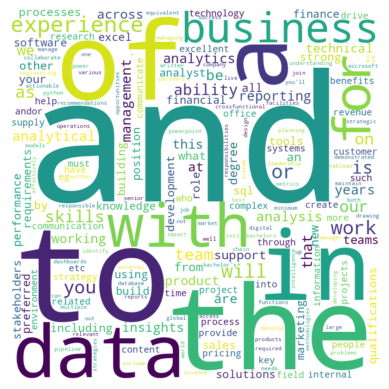

In [ ]:
# Create a dictionary of terms and frequencies
term_freq_w_junk_dict = dict(zip(term_freq_w_junk['term'], term_freq_w_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_w_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Remove Stopwords and Excludes
# Concatenate to one dataframe
excludes_stopwords = pd.concat([stopwords_df,exclude_df],axis=0)

# normalize the strings in the term_freq_w_junk dataframe
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.normalize('NFKD')
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.strip()

# Remove stop words and excludes from the DataFrame
term_freq_wo_junk = (term_freq_w_junk
             .merge(excludes_stopwords, how='left', left_on='term', right_on='stopword')
             .query("stopword.isna()")
             .drop(['stopword'], axis=1)
            )

term_freq_wo_junk

,term,freq
6,data,222
8,,164
10,business,155
11,experience,147
14,work,107
...,...,...
2509,implements,1
2510,impacted,1
2511,imagination,1
2512,il,1


In [ ]:
# Check the top 10 by using .iloc and selecting the first 1o rows
term_freq_wo_junk.iloc[0:10]

,term,freq
6,data,222
8,,164
10,business,155
11,experience,147
14,work,107
18,skills,85
19,team,80
22,ability,71
26,analysis,56
27,analytical,56


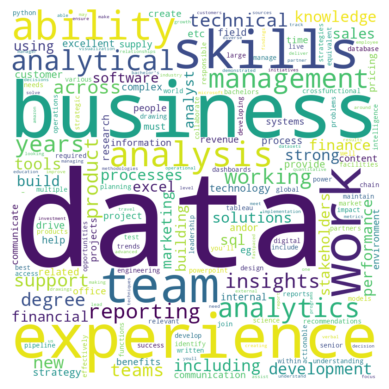

In [ ]:
# Create a dictionary of terms and frequencies
term_freq_wo_junk_dict = dict(zip(term_freq_wo_junk['term'], term_freq_w_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_wo_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

3. Create a wordcloud for the terms that start with the letter "a"
> Hint: Filter the data using something like this
```python
term_frequency['term'].str.startswith('a')
```

In [ ]:
# Create a wordcloud for the terms that start with the letter "a"
term_frequency = term_freq_wo_junk['term'].str.startswith('a')
term_frequency.value_counts() # Output: 198 words that start with the letter "a"

False    2210
True      198
Name: term, dtype: int64

In [ ]:
# Apply the boolean mask and assign the data as a dataframe
term_freq_a = term_freq_wo_junk[term_frequency]
term_freq_a

,term,freq
22,ability,71
26,analysis,56
27,analytical,56
29,analytics,54
37,across,49
...,...,...
2034,automate,1
2083,availability,1
2102,awards,1
2103,awarded,1


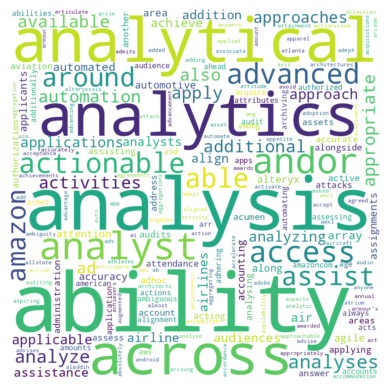

In [ ]:
# Create a dictionary of terms and frequencies that start with the letter "a"
term_freq_a_dict = dict(zip(term_freq_a['term'], term_freq_a['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_a_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

4. Create a word cloud of companies

In [ ]:
# Let's create a dataframe for companies and then we will create a wordcloud for companies. With firm, we do not have to worry much about junk words
companies_freq = (df_jobs
            .groupby("firm")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
companies_freq

,firm,freq
0,United Airlines,3
1,Nvidia,3
2,Amazon,3
3,Bose,2
4,Delta Airlines,2
5,Nike,2
6,Live Nation Entertainment,2
7,Major League Baseball,2
8,Meta,1
9,Under Armour,1


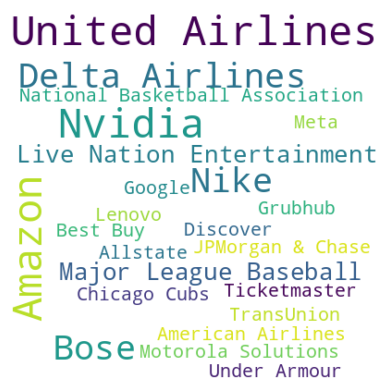

In [ ]:
# Create a dictionary of terms and frequencies
companies_freq_dict = dict(zip(companies_freq['firm'], companies_freq['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(companies_freq_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_jobs

,title,firm,job_description
0,Business Analyst,Live Nation Entertainment,The team oversees strategy and analytics for t...
1,Pricing Analyst,Ticketmaster,Ticketmaster Travel is a new service we are in...
2,Data Analyst,Live Nation Entertainment,"Passionate and driven, with an entrepreneurial..."
3,Analyst - Digital Technology,United Airlines,There’s never been a more exciting time to joi...
4,"Analyst/Senior Analyst, Corporate Development",American Airlines,Are you ready to explore a world of possibilit...
5,Data Analytics Manager,United Airlines,There’s never been a more exciting time to joi...
6,"Specialist, Reporting, and Business Analysis",Delta Airlines,"The Specialist, Reporting and Business Analysi..."
7,Data Analyst - Supply Chain,Delta Airlines,We’re seeking a highly motivated and experienc...
8,Analyst - Supply Chain Analytics,United Airlines,Technical Operations supply chain requires ski...
9,Consumer Sales Analyst,Nvidia,We are looking for a Sales Analyst to join our...


5. Create a word cloud of job titles.

In [ ]:
# Let's create a dataframe for companies and then we will create a wordcloud for companies. With firm, we do not have to worry much about junk words
job_title_freq = (df_jobs
            .groupby("title")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
job_title_freq

,title,freq
0,Analyst - Digital Technology,1
1,Lead Data Science Analyst,1
2,Digital Content Strategy and Analytics Lead,1
3,FP&A Analyst II,1
4,Facilities Digital Data Manager,1
5,Finance FP&A Analyst,1
6,Financial & Business Analyst,1
7,"Global Services Business Intelligence, Data An...",1
8,Manager Database Marketing,1
9,Analyst - Supply Chain Analytics,1


In [ ]:
# Let'' try to remove punctuation and try to codense our list
# This code does not seem to work
job_title_freq_ = (job_title_freq['title']
             .str.lower()
             .str.strip() # remove leading and trailing spaces
             .str.normalize('NFKD') # string encodings
             .str.replace(f"[{string.punctuation}]", "")
             .str.replace(',', '')
             .reset_index(drop=True)
             .to_frame('title')
          )
job_title_freq

,title,freq
0,Analyst - Digital Technology,1
1,Lead Data Science Analyst,1
2,Digital Content Strategy and Analytics Lead,1
3,FP&A Analyst II,1
4,Facilities Digital Data Manager,1
5,Finance FP&A Analyst,1
6,Financial & Business Analyst,1
7,"Global Services Business Intelligence, Data An...",1
8,Manager Database Marketing,1
9,Analyst - Supply Chain Analytics,1


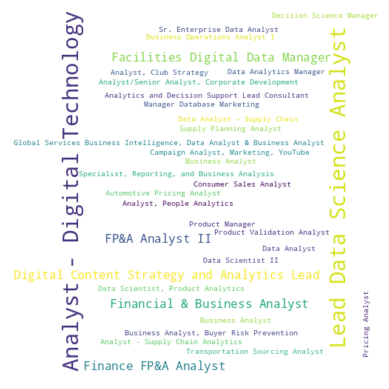

In [ ]:
# Create a dictionary of terms and frequencies
job_title_dict = dict(zip(job_title_freq['title'], job_title_freq['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=500, height=500, background_color='white').generate_from_frequencies(job_title_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 2 - Words after DATA

Clearly "DATA" an important word so what words come after data?

1.	Create a bi-gram of Job Description terms starting with the word "Data", group by bigram and count them up into a `bigram_term_frequency` table. A good reference is the bigram example [here](https://colab.research.google.com/drive/1DdK_2Pn-LRSNnUhfuyBLEZlWvoFbffM_?usp=sharing).

In [ ]:
ngram_size = 2

# Extract bi-grams from the "full_text" column
bigram_jobs_df = (df_jobs['job_description']
             .str.lower()
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .str.split()
             .apply(lambda x: list(ngrams(x, ngram_size))) # Extract bi-grams
             .explode()
             .reset_index(drop=True)
             .to_frame('bigram')
          )


# Count the bigrams
bigram_jobs_freq = (bigram_jobs_df.groupby("bigram")
                     .agg(freq=("bigram", "count"))
                     .reset_index()
                     .sort_values("freq", ascending=False)
                     .dropna()
                     .reset_index(drop=True)
            )
# Let's now filter our bigrams for the word data
bigram_jobs_freq['bigram'] = bigram_jobs_freq['bigram'].apply(
    lambda x: ' '.join([bigram for bigram in x if  pd.notna(bigram) and bigram.lower() not in stop_words]) # this code is processing each list of bigrams and filterying out any bigrams that 'NaN' and lower case stop words and joining the filtered bigrams back into a space-serparated string
)
bigram_term_freq = bigram_jobs_freq[(bigram_jobs_freq['bigram'].str.startswith('data '))] # now let's find the bigrams that start with data by selecting the bigram column and using .str.startswith(' ')

# eyeball them
bigram_term_freq.head(10)

,bigram,freq
22,data analysis,19
71,data analytics,10
161,data visualizations,7
196,data sets,6
219,data visualization,6
233,data analyst,6
258,data science,5
339,data mining,4
401,data management,4
402,data manager,4


2. Create a word cloud of data + term combinations, by filter the bigram_term_frequency for bigrams starting with “data”

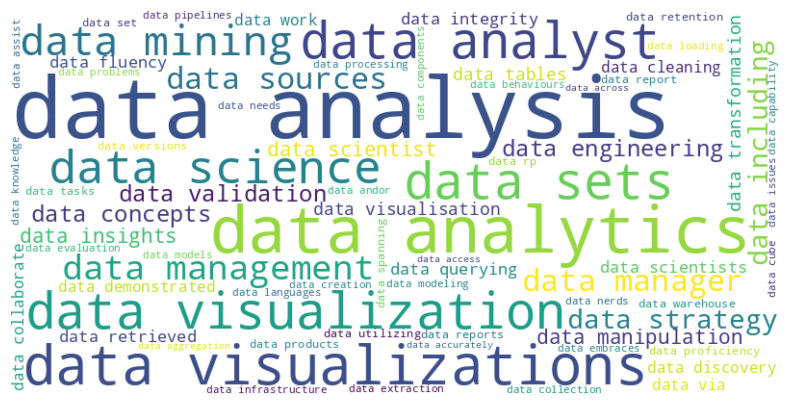

In [ ]:
# assume that 'bigram_freq' is a DataFrame containing bigrams and their frequencies
bigram_term_freq['freq'] = pd.to_numeric(bigram_term_freq['freq'])

# Create a dictionary of terms and frequencies
bigram_dict = dict(zip(bigram_term_freq['bigram'], bigram_term_freq['freq']))


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

3. Create a bar chart of the top 10, data + term combinations.


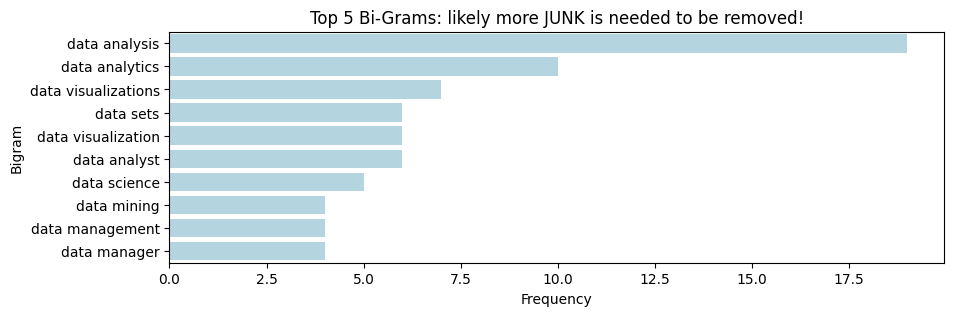

In [ ]:
# Create bar plot of top 10 terms
plt.figure(figsize=(10, 3))
sns.barplot(x="freq", y="bigram", data=bigram_term_freq.head(10), color="lightblue")
plt.title('Top 5 Bi-Grams: likely more JUNK is needed to be removed!')
plt.xlabel('Frequency')
plt.ylabel('Bigram');

## Task 3 - Analyze Technology

Here is a list of important technology terms - you of course should add more.
- creat 2 lists as shown below
- add any additional technology term or bigram that you think are useful.

```python
technology_words = [
    "analytics",
    "data",
    "analyze",
    "r",
    "python",
    "sql",
    "excel",
    "cloud",
    "aws",
    "azure",
    "ec2",
    "sas",
    "spss",
    "saas",
    "spark",
    "tensorflow",
    "sagemaker",
    "tableau",
    "hadoop",
    "pyspark",
    "h2o.ai",
    "spark",
    "ai",
    "shiny",
    "dash",
    "pca",
    "k-means",
    "emr",
    "mapreduce",
    "nosql",
    "hive",
    "presentation",
    "nltk",
    "scikit",
    "javascript",
    "etl"]


technology_bigrams = [
  "business intelligence",
  "text mining",
  "logistic regression",
  "amazon web",
  "big data",
  "business analytics",
  "google cloud",
  "microsoft azure",
  "machine learning",
  "data science",
  "deep learning",
  "neural network",
  "neural networks",
  "neural nets",
  "random forests",
  "random forest",
  "elastic search",
  "map reduce",
  "artificial intelligence"]
```

1. Filter the `term_frequency` table you made in task 1 based on the `technology_words` provided, resulting a new table `tech_term_freq`

2. Filter the `bigram_frequency` table you made in task 2 based on `technology_bigrams` provided, resulting a new table `tech_bigram_freq`

3. Smash the 2 tables together vertically as new table `technology_term_frequency` using `pd.concate()`
> Hint: only include 2 columns, "terms" and "freq"

4. Make a Bar Chart of top 10 Technolgy Terms.

5. Make a Wordcloud of all Techology Terms.

In [ ]:
technology_words = [
    "analytics",
    "data",
    "analyze",
    "r",
    "python",
    "sql",
    "excel",
    "cloud",
    "aws",
    "azure",
    "ec2",
    "sas",
    "spss",
    "saas",
    "spark",
    "tensorflow",
    "sagemaker",
    "tableau",
    "hadoop",
    "pyspark",
    "h2o.ai",
    "spark",
    "ai",
    "shiny",
    "dash",
    "pca",
    "k-means",
    "emr",
    "mapreduce",
    "nosql",
    "hive",
    "presentation",
    "nltk",
    "scikit",
    "javascript",
    "etl",
    'stata']


technology_bigrams = [
  "business intelligence",
  "text mining",
  "logistic regression",
  "amazon web",
  "big data",
  "business analytics",
  "google cloud",
  "microsoft azure",
  "machine learning",
  "data science",
  "deep learning",
  "neural network",
  "neural networks",
  "neural nets",
  "random forests",
  "random forest",
  "elastic search",
  "map reduce",
  "artificial intelligence"]

In [ ]:
# Filter the term_frequency table you made in task 1 based on the technology_words provided, resulting a new table tech_term_freq
tech_words = term_freq_wo_junk['term'].isin(technology_words)
print(tech_words.value_counts()) # 16 words in our original table that have technology words

# Apply the boolean mask and create a new table called tech_term_freq
tech_term_freq = term_freq_wo_junk[tech_words]
tech_term_freq

False    2392
True       16
Name: term, dtype: int64


,term,freq
6,data,222
29,analytics,54
62,sql,29
68,excel,28
136,python,17
151,tableau,16
273,analyze,9
287,r,9
452,presentation,6
465,sas,6


In [ ]:
# Filter the bigram_frequency table you made in task 2 based on technology_bigrams provided, resulting a new table tech_bigram_freq
tech_bigrams = bigram_jobs_freq['bigram'].isin(technology_bigrams)
print(tech_bigrams.value_counts()) # 4 words in our original table that have technology words

# Apply the boolean mask and create a new table called tech_term_freq
tech_bigram_freq = bigram_jobs_freq[tech_bigrams]
tech_bigram_freq

False    9469
True        4
Name: bigram, dtype: int64


,bigram,freq
129,business intelligence,8
258,data science,5
271,machine learning,5
5728,big data,1


In [ ]:
# Rename bigram column as we will concatenate the two tables
tech_bigram_freq = tech_bigram_freq.rename(columns={'bigram': 'term'})
tech_bigram_freq

,term,freq
129,business intelligence,8
258,data science,5
271,machine learning,5
5728,big data,1


In [ ]:
# Smash the 2 tables together vertically as new table technology_term_frequency using pd.concate()
# Hint: only include 2 columns, "terms" and "freq"
technology_term_frequency = pd.concat([tech_term_freq, tech_bigram_freq], ignore_index=True)
technology_term_frequency

,term,freq
0,data,222
1,analytics,54
2,sql,29
3,excel,28
4,python,17
5,tableau,16
6,analyze,9
7,r,9
8,presentation,6
9,sas,6


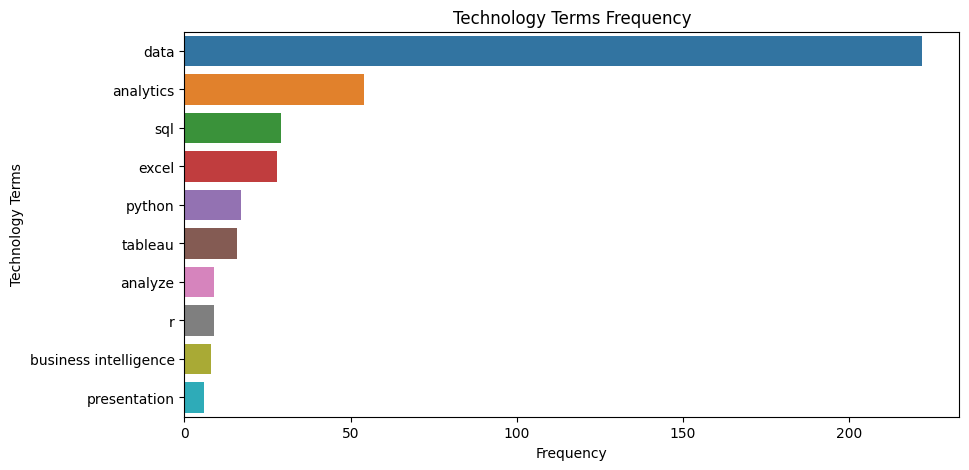

In [ ]:
# Make a Bar Chart of top 10 Technolgy Terms.
top_10_tech_terms = technology_term_frequency.nlargest(10, 'freq')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_tech_terms, x="freq", y="term")
plt.xlabel("Frequency")
plt.ylabel("Technology Terms")
plt.title("Technology Terms Frequency")
plt.show()

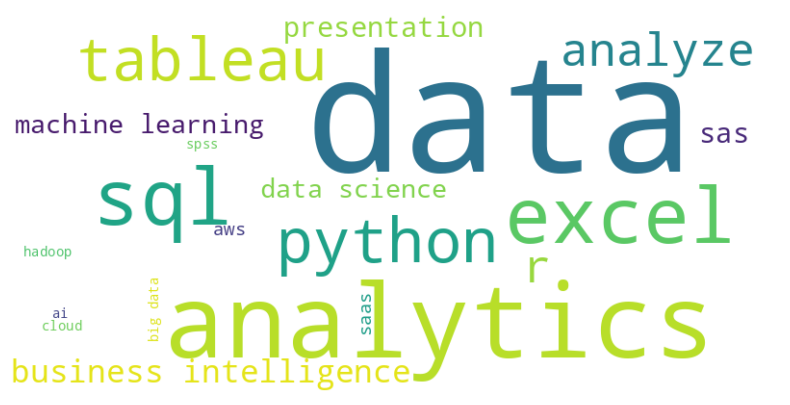

In [ ]:
# Make a Wordcloud of all Techology Terms.
# Create a dictionary of terms and frequencies
technology_term_frequency_dict = dict(zip(technology_term_frequency['term'], technology_term_frequency['freq']))


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(technology_term_frequency_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 4 - Your Resume

1. Save/print your resume as PDF, it needs to be PDF format for this to work.

2. Install pdfminer and import the function extract_text()

3. Use PdfReader to read your resume into a table. For example:

```python
!pip install pdfminer.six
from pdfminer.high_level import extract_text

def extract_text_from_pdf(file_path):
    return extract_text(file_path)

text = extract_text_from_pdf('your_file.pdf')
print(text)

# Split text by rows and store them as a data frame
cv_df = pd.DataFrame({'cv_text': text.split('\n')})

```

4. Parse your resume, filter out the common words, digits, and any excludes

5. Create a word cloud of the remaining words in your resume

6. Filter for technology_words and technology_bigrams smash the results together (just like in task 3). To do this, you will need to
  - create Words Freq and Bigram Freq based on your resume
  - then filter for technology_words and technology_bigrams

7. Make a bar chart of top 10 combined technolgy term frequencies
8. Make a wordcloud of all combined technolgy term frequencies

In [ ]:
# Download pdf miner
!pip install pdfminer.six
from pdfminer.high_level import extract_text

def extract_text_from_pdf(file_path):
    return extract_text(file_path)

text = extract_text_from_pdf('/content/Anthony Ayala Resume (First Draft).pdf')
print(text)

# Split text by rows and store them as a data frame
cv_df = pd.DataFrame({'cv_text': text.split('\n')})

Anthony Ayala 
Kind | Genial | Business Analyst 
Winston-Salem, NC | ayalax19@wfu.edu | 224.805.2048 | www.linkedin.com/in/ayalax19 

EDUCATION 
Wake Forest University School of Business 
Master of Science in Business Analytics | GPA:  
Relevant Coursework:  Analytics Technology Software (Python), Probability & Statistical Modeling (Excel)  

Winston-Salem, NC 
May 2024 

Wake Forest University 
Bachelor of Art: Economics Minor: Mathematics & Spanish | GPA: 3.3  
Relevant Coursework: Probability, Intro to Regression & Data Science, and Generalized Linear Models 
Honors: Dean’s List, Bank of America Leadership Scholarship, member in the First in Forest program  

Winston-Salem, NC 
May 2023 

Study Abroad: Universidad de Salamanca, Spring 2022 

RELEVANT SKILLS 
Microsoft Office Suite:  Word (Advanced), Excel (Advanced), PowerPoint (Proficient), Outlook  
Technical Skills: R, Python, Zoom, HubSpot, MySQL | Certifications: Business Analyst (Udemy)  
Languages: Spanish (fluent), English (

In [ ]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cv_text  93 non-null     object
dtypes: object(1)
memory usage: 872.0+ bytes


In [ ]:
# Parse your resume, filter our common words, digits, and any words/terms that you don't want to include
# Get all punctuation
all_punctuation = string.punctuation

# Remove '@' from the string of punctuation
punctuation_without_at = all_punctuation.replace('@', '')

resume_df = (cv_df['cv_text']
             .explode() # create rows of words
             .str.lower()
             .str.replace('','')
             .str.normalize('NFKD') # string encodings
             .str.strip() # remove leading and trailing spaces
             .str.replace(f"[{all_punctuation}]", "", regex=True) # Remove punctuation
             .str.replace('●', '')
             .str.replace('|', '')
             .reset_index(drop=True)
             .to_frame('cv_text')
          )
resume_df.head(10)

,cv_text
0,anthony ayala
1,kind genial business analyst
2,winstonsalem nc ayalax19wfuedu 2248052048 w...
3,
4,education
5,wake forest university school of business
6,master of science in business analytics gpa
7,relevant coursework analytics technology soft...
8,
9,winstonsalem nc


In [ ]:
resume_df = (resume_df['cv_text']
             .str.lower()
             .str.strip() # remove leading and trailing spaces
             .str.normalize('NFKD') # string encodings
             .str.split() # make a list of text
             .explode() # create rows of words
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .reset_index(drop=True)
             .to_frame('cv_text')
          )
resume_df

,cv_text
0,anthony
1,ayala
2,kind
3,genial
4,business
...,...
450,NaN
451,NaN
452,NaN
453,NaN


In [ ]:
# Let's create a dataframe and have frequency
cv_freq_w_junk = (resume_df
            .groupby("cv_text")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
cv_freq_w_junk.head(20)

,cv_text,freq
0,and,24
1,the,10
2,in,9
3,data,6
4,forest,5
5,of,5
6,analysis,5
7,on,5
8,skills,5
9,program,5


In [ ]:
# Remove Stopwords and Excludes
# Concatenate to one dataframe
excludes_stopwords = pd.concat([stopwords_df,exclude_df],axis=0)

# normalize the strings in the term_freq_w_junk dataframe
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.normalize('NFKD')
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.strip()

# Remove stop words and excludes from the DataFrame
cv_freq_wo_junk = (cv_freq_w_junk
             .merge(excludes_stopwords, how='left', left_on='cv_text', right_on='stopword')
             .query("stopword.isna()")
             .drop(['stopword'], axis=1)
            )

cv_freq_wo_junk

,cv_text,freq
3,data,6
4,forest,5
6,analysis,5
8,skills,5
9,program,5
...,...,...
258,integration,1
259,interactive,1
260,intro,1
261,involvement,1


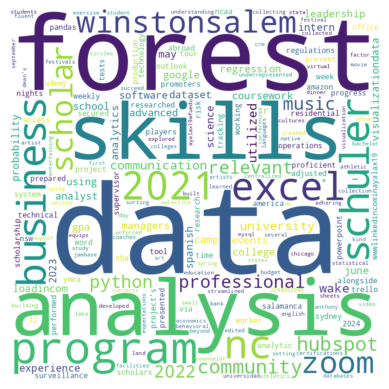

In [ ]:
# Create a word cloud of the remaining words in your resume
# Create a dictionary of terms and frequencies
cv_freq_wo_junk_dict = dict(zip(cv_freq_wo_junk['cv_text'], cv_freq_wo_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(cv_freq_wo_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Filter for technology_words and technology_bigrams smash the results together (just like in task 3). To do this, you will need to
# Create Words Freq and Bigram Freq based on your resume
# Then filter for technology_words and technology_bigrams
# Filter the term_frequency table you made in task 1 based on the technology_words provided, resulting a new table tech_term_freq
resume_tech_words = cv_freq_wo_junk['cv_text'].isin(technology_words)
print(resume_tech_words.value_counts()) # 5 words in our original table that have technology words

# Apply the boolean mask and create a new table called tech_term_freq
resume_tech_term_freq = cv_freq_wo_junk[resume_tech_words]
resume_tech_term_freq

False    237
True       6
Name: cv_text, dtype: int64


,cv_text,freq
3,data,6
16,excel,4
25,python,3
47,r,2
56,analytics,2
146,stata,1


In [ ]:
# Creating a bigram
ngram_size = 2

# Extract bi-grams from the "full_text" column
bigram_resume_df = (cv_df['cv_text']
             .str.lower()
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .str.split()
             .apply(lambda x: list(ngrams(x, ngram_size))) # Extract bi-grams
             .explode()
             .reset_index(drop=True)
             .to_frame('bigram')
          )


# Count the bigrams
bigram_resume_freq = (bigram_resume_df.groupby("bigram")
                     .agg(freq=("bigram", "count"))
                     .reset_index()
                     .sort_values("freq", ascending=False)
                     .dropna()
                     .reset_index(drop=True)
            )
# Let's now filter our bigrams for the word data
bigram_resume_freq['bigram'] = bigram_resume_freq['bigram'].apply(
    lambda x: ' '.join([bigram for bigram in x if  pd.notna(bigram) and bigram.lower() not in stop_words]) # this code is processing each list of bigrams and filterying out any bigrams that 'NaN' and lower case stop words and joining the filtered bigrams back into a space-serparated string
)

# eyeball them
bigram_resume_freq.head(10)

,bigram,freq
0,,4
1,scholar program,4
2,schuler scholar,4
3,winstonsalem nc,4
4,skills utilized,3
5,analysis,3
6,forest university,3
7,wake forest,3
8,relevant coursework,2
9,business analyst,2


In [ ]:
# Filter the bigram_frequency table you made in task 2 based on technology_bigrams provided, resulting a new table tech_bigram_freq
res_tech_bigrams = bigram_resume_freq['bigram'].isin(technology_bigrams)
print(res_tech_bigrams.value_counts()) # 2 words in our original table that have technology words

# Apply the boolean mask and create a new table called tech_term_freq
res_tech_bigram_freq = bigram_resume_freq[res_tech_bigrams]
res_tech_bigram_freq

False    342
True       2
Name: bigram, dtype: int64


,bigram,freq
182,business analytics,1
317,data science,1


In [ ]:
res_tech_bigram_freq = res_tech_bigram_freq.rename(columns={'bigram': 'cv_text'})
res_tech_bigram_freq

,cv_text,freq
182,business analytics,1
317,data science,1


In [ ]:
# Smash the 2 tables together vertically as new table technology_term_frequency using pd.concate()
# Hint: only include 2 columns, "terms" and "freq"
res_technology_term_frequency = pd.concat([resume_tech_term_freq, res_tech_bigram_freq], ignore_index=True)
res_technology_term_frequency

,cv_text,freq
0,data,6
1,excel,4
2,python,3
3,r,2
4,analytics,2
5,stata,1
6,business analytics,1
7,data science,1


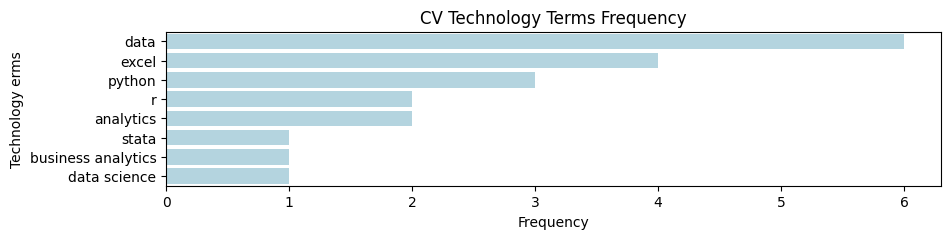

In [ ]:
# Make a bar chart of top 10 combined technolgy term frequencies
plt.figure(figsize=(10, 2))
sns.barplot(x="freq", y="cv_text", data=res_technology_term_frequency, color="lightblue")
plt.title('CV Technology Terms Frequency')
plt.xlabel('Frequency')
plt.ylabel('Technology erms');

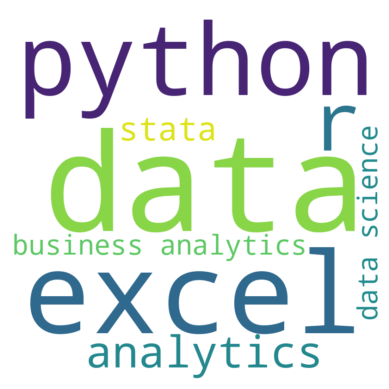

In [ ]:
# Make a wordcloud of all combined technolgy term frequencies
# Create a dictionary of terms and frequencies
res_technology_term_frequency_dict = dict(zip(res_technology_term_frequency['cv_text'], res_technology_term_frequency['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(res_technology_term_frequency_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Task 5 - Compare Resume vs Jobs

1. What terms do your resume and jobs data have in common? That is, compare your resume’s terms to the terms found in the job descriptions. Find the top 10 terms in common.
> Hint: `pd.merge(how='inner')` or how ever you want to do it.

2. Based on the job's terms, what terms are missing from your resume? Make a table of top 10 terms missing from your resume but found in your job descriptions.
> Hint: `pd.merge(how='left')` or how ever you want to do it.

3. What tech-skills does your resume and jobs have in common? Find the top 5 technology terms.
> Hint: `pd.merge(how='inner')` or filter `.isin()`


4. Based on the job's tech-skills, what are top 5 skills are missing from your resume?
> Hint: `pd.merge(how='left')` or filter not in

In [ ]:
# 1. What terms do your resume and jobs data have in common? That is, compare your resume’s terms to the terms found in the job descriptions. Find the top 10 terms in common.
# Hint: pd.merge(how='inner') or how ever you want to do it.
common_terms_joined = cv_freq_wo_junk.merge(
    term_df,
    left_on='cv_text',
    right_on='term',
    how='inner'
)
common_terms_joined[['cv_text', 'term', 'freq']].drop_duplicates('cv_text').nlargest(10,'freq')

,cv_text,term,freq
0,data,data,6
222,analysis,analysis,5
278,skills,skills,5
363,program,program,5
371,business,business,4
526,excel,excel,4
554,zoom,zoom,4
555,community,community,3
558,professional,professional,3
566,music,music,3


In [ ]:
#Based on the job's terms, what terms are missing from your resume? Make a table of top 10 terms missing from your resume but found in your job descriptions.
# Hint: pd.merge(how='left') or how ever you want to do it.
# I think a boolean mask will be appropriate
#missing_terms = ~cv_freq_wo_junk['cv_text'].isin(term_df['term'])
missing_terms = ~term_freq_wo_junk['term'].isin(cv_freq_wo_junk['cv_text'])
print(missing_terms.value_counts())

# Apply the boolean mask
missing_terms_res = term_freq_wo_junk[missing_terms]
missing_terms_res.nlargest(11,'freq') # the first row has an empty term, so we will just ignore it for now and use nlargest(11)

True     2292
False     116
Name: term, dtype: int64


,term,freq
8,,164
14,work,107
19,team,80
22,ability,71
27,analytical,56
30,years,53
31,reporting,53
35,insights,50
36,product,50
37,across,49


In [ ]:
# What tech-skills does your resume and jobs have in common? Find the top 5 technology terms.
# Hint: pd.merge(how='inner') or filter .isin()
common_tech_terms_joined = res_technology_term_frequency.merge(
    term_df,
    left_on='cv_text',
    right_on='term',
    how='inner'
)
common_tech_terms_joined[['cv_text', 'term', 'freq']].drop_duplicates('cv_text').nlargest(5,'freq')

,cv_text,term,freq
0,data,data,6
222,excel,excel,4
250,python,python,3
267,r,r,2
276,analytics,analytics,2


In [ ]:
# Based on the job's tech-skills, what are top 5 skills are missing from your resume?
# Hint: pd.merge(how='left') or filter not in
missing_tech_terms = ~term_freq_wo_junk['term'].isin(res_technology_term_frequency['cv_text'])
print(missing_tech_terms.value_counts())

# Apply the boolean mask
missing_tech_terms_res = term_freq_wo_junk[missing_tech_terms]
missing_tech_terms_res.nlargest(6,'freq')

True     2403
False       5
Name: term, dtype: int64


,term,freq
8,,164
10,business,155
11,experience,147
14,work,107
18,skills,85
19,team,80


In [ ]:
# These are the skills I know I am missing on my resume so let's try to filter correctly this on my resume
sql = term_freq_wo_junk['term'].str.contains('sql').value_counts()
print(sql)
powerbi = term_freq_wo_junk['term'].str.contains('powerbi').value_counts()
print(powerbi)
tableau = term_freq_wo_junk['term'].str.contains('tableau').value_counts()
print(tableau)
sas = term_freq_wo_junk['term'].str.contains('sas').value_counts()
print(sas)
alteryx = term_freq_wo_junk['term'].str.contains('alteryx').value_counts()
print(alteryx)

False    2405
True        3
Name: term, dtype: int64
False    2407
True        1
Name: term, dtype: int64
False    2406
True        2
Name: term, dtype: int64
False    2406
True        2
Name: term, dtype: int64
False    2406
True        2
Name: term, dtype: int64


In [ ]:
# These are the five tech skills I know Im missing on my resume so I will try to filter this to my resume and make this this boolean mask works
five_missing_tech_skills = (term_freq_wo_junk['term'] == 'sql') | \
                            (term_freq_wo_junk['term'] == 'powerbi') | \
                            (term_freq_wo_junk['term'] == 'tableau') | \
                            (term_freq_wo_junk['term'] == 'sas') | \
                            (term_freq_wo_junk['term'] == 'alteryx')

# Now you can use this boolean mask to filter the DataFrame
job_descriptions_missing_tech = term_freq_wo_junk[five_missing_tech_skills]
print(job_descriptions_missing_tech)

         term  freq
62        sql    29
151   tableau    16
465       sas     6
628   alteryx     4
2263  powerbi     1


In [ ]:
res_technology_term_frequency.rename(columns={'cv_text': 'term'}, inplace=True)

In [ ]:
# Apply this to resume
missing_tech_terms = ~job_descriptions_missing_tech['term'].isin(res_technology_term_frequency['term'])
print(missing_tech_terms.value_counts())

# Apply the boolean mask
missing_tech_terms_res = job_descriptions_missing_tech[missing_tech_terms]
missing_tech_terms_res.nlargest(5,'freq')

True    5
Name: term, dtype: int64


,term,freq
62,sql,29
151,tableau,16
465,sas,6
628,alteryx,4
2263,powerbi,1


## Finally
Convert this to **HTML** and do you writeup in a **Word document**.